# preparation

In [1]:
import pyhere
root = pyhere.here().resolve()

print(root)

/work/Walmart_analysis


In [2]:
import kaggle

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data processing

## data extraccion

In [4]:
!kaggle datasets download -d aslanahmedov/walmart-sales-forecast -p {root.joinpath('data')} --unzip

  0%|                                               | 0.00/3.36M [00:00<?, ?B/s]
100%|██████████████████████████████████████| 3.36M/3.36M [00:00<00:00, 92.2MB/s]


In [5]:
features = pd.read_csv(root.joinpath('data','features.csv'))
features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [6]:
stores = pd.read_csv(root.joinpath('data','stores.csv'))
stores.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


## data cleaning

### nan filing

In [7]:
stores['Store'] = stores['Store'].astype('object')
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     object
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


In [8]:
features['Store'] = features['Store'].astype('object')
features['Date'] = features['Date'].apply(pd.to_datetime)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   object        
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), object(1)
memory usage: 712.0+ KB


In [9]:
features_filled = features.copy(deep=True)

features_filled[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = features_filled[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

for column in ['CPI','Unemployment']:
    mean_value = features_filled[column].mean()
    features_filled[column] = features_filled[column].fillna(mean_value)

features_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   object        
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), object(1)
memory usage: 712.0+ KB


In [10]:
df_filled = pd.merge(features_filled,stores,on='Store')
df_filled.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315


In [11]:
df_raw = pd.merge(features,stores,on='Store')
df_raw.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315


¿is the nan managing correct?
-

- in the markdowns when there is a nan value it means that there is no descount so its makes sence to filled with 0
- in the other features the distribution fits better when they are filled with the avarage value

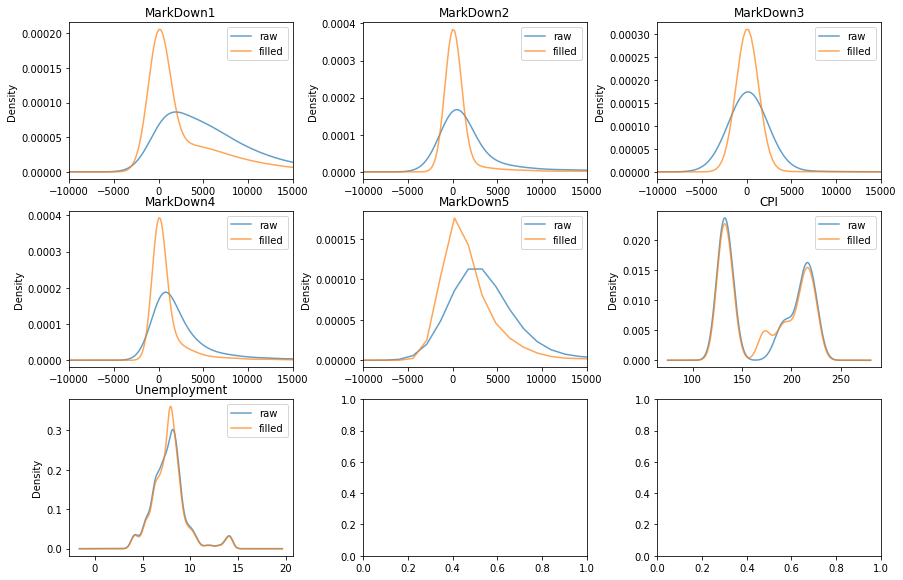

In [12]:
fig,axs = plt.subplots(3,3,figsize=(12,8))
plt.tight_layout(w_pad=4)
columns = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment']

for feature, ax in zip(columns,axs.flatten()):    
    df_raw[feature].plot(kind='kde',label=f'raw',ax=ax,alpha=0.7)
    df_filled[feature].plot(kind='kde',label=f'filled',ax=ax,alpha=0.7)

    if feature.startswith('MarkDown'):
        ax.set_xlim(-10000,15000)
    ax.set_title(feature)
    ax.legend(loc="upper right")

### outlier filter

In [13]:
df_

NameError: name 'df_' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=740c3fbb-6503-48b5-8790-fc69ebaa42e0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>